In [1]:
     #1 #2 #3 #4 #5 #6 #7 #8 #9#10#11#12 #S #F
M= [[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],#1
    [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#2
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#3
    [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],#4
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#5
    [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],#6
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#7
    [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1],#8
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#9
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],#10
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#11
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#12
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#S
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]]#F




In [28]:
# граф
graph = {
        's': ['1'],
        '1': ['2','10','s'],
        '2': ['1','3','4'],
        '3': ['2'],
        '4': ['2','5','6'],
        '5': ['4'],
        '6': ['4','7','8'],
        '7': ['6'],
        '8': ['f','6','9'],
        '9': ['8'],
        '10':['11','12'],
        '11':['19'],
        '12':['10'],
        'f': ['8']
        }
graph ={
        0: [1],
        1: [2,10,0],
        2: [1,3,4],
        3: [2],
        4: [2,5,6],
        5: [4],
        6: [4,7,8],
        7: [6],
        8: [13,6,9],
        9: [8],
        10:[11,12],
        11:[10],
        12:[10],
        13:[8]
        }
def bfs(graph, start, end):
    queue = []
    queue.append([start])
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node == end:
            return path
        for adjacent in graph.get(node, []):
            new_path = list(path)
            new_path.append(adjacent)
            queue.append(new_path)

bfs(graph, 0, 13)

[0, 1, 2, 4, 6, 8, 13]

In [3]:

graph = {
        's': set(['1']),
        '1': set(['2','10','s']),
        '2': set(['1','3','4']),
        '3': set(['2']),
        '4': set(['2','5','6']),
        '5': set(['4']),
        '6': set(['4','7','8']),
        '7': set(['6']),
        '8': set(['f','6','9']),
        '9': set(['8']),
        '10':set(['11','12']),
        '11':set(['10']),
        '12':set(['10']),
        'f': set(['8'])
        }
print(graph)
def dfs_paths(graph, start, goal):
    stack = [(start, [start])]
    while stack:
        (vertex, path) = stack.pop()
        for next in graph[vertex] - set(path):
            if next == goal:
                yield path + [next]
            else:
                stack.append((next, path + [next]))

list(dfs_paths(graph, 's', 'f')) 

{'s': {'1'}, '1': {'10', 's', '2'}, '2': {'3', '4', '1'}, '3': {'2'}, '4': {'6', '5', '2'}, '5': {'4'}, '6': {'8', '4', '7'}, '7': {'6'}, '8': {'f', '9', '6'}, '9': {'8'}, '10': {'12', '11'}, '11': {'10'}, '12': {'10'}, 'f': {'8'}}


[['s', '1', '2', '4', '6', '8', 'f']]

In [4]:
from heapq import *
from collections import defaultdict


def dijkstra(M, f, t):
    edges=[]
    for i in range(len(M)):
        for j in range(len(M[i])):
            if M[i][j] != 0:
                edges.append((str(i), str(j), M[i][j]))
                
    g = defaultdict(list)
    for l,r,c in edges:
        g[l].append((c,r))

    q, seen, mins = [(0,f,())], set(), {f: 0}
    while q:
        (cost,v1,path) = heappop(q)
        if v1 not in seen:
            seen.add(v1)
            path = (v1, path)
            if v1 == t: return (cost, path)

            for c, v2 in g.get(v1, ()):
                if v2 in seen: continue
                prev = mins.get(v2, None)
                next = cost + c
                if prev is None or next < prev:
                    mins[v2] = next
                    heappush(q, (next, v2, path))

    return float("inf"), None

    #S #1 #2 #3 #4 #5 #6 #7 #8 #9 #10#11#12 #F
M= [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#S+1
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],#1+1
    [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],#2+1
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#3+1
    [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],#4+1
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],#5+1
    [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0],#6+1
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],#7+1
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],#8+1
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],#9+1
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],#10+1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],#11+1
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],#12+1
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]]#F+1
edges=[]

print(edges)
S=0
F=9
print(len(M))
print ("=== Dijkstra ===")
print ("S >> F:")
print (S,">>",F)
print (dijkstra(M, '0', '13'))

[]
14
=== Dijkstra ===
S >> F:
0 >> 9
(6, ('13', ('8', ('6', ('4', ('2', ('1', ('0', ()))))))))


100
200
300
400
500
600
700
800
900


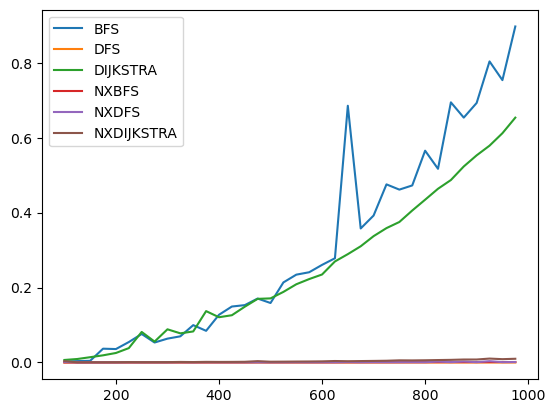

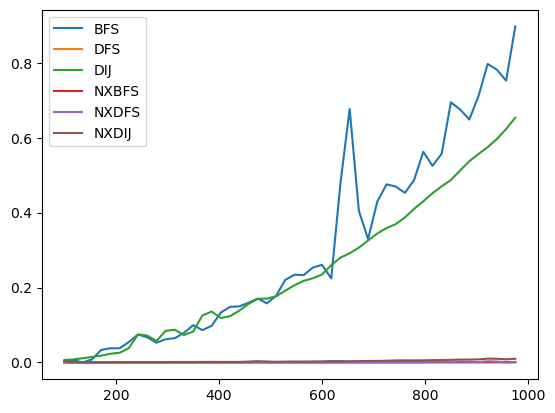

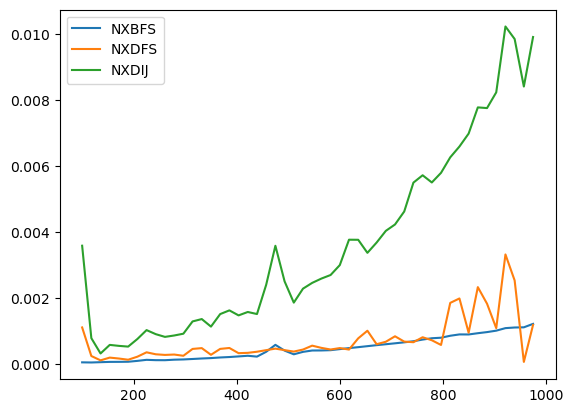

<Figure size 640x480 with 0 Axes>

In [5]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import time
from heapq import *
from collections import defaultdict
import networkx as nx
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import breadth_first_order
from scipy.sparse.csgraph import depth_first_order
from scipy.sparse.csgraph import shortest_path


boba=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0]
#boba=[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

def generate_random_graph(n, max_weight):
    # Initialize an empty adjacency matrix with n nodes
    graph = [[0 for i in range(n)] for j in range(n)]
    
    # Iterate over all pairs of nodes
    for i in range(n):
        for j in range(i + 1, n):
            # Generate a random weight between 0 and max_weight
            #weight = random.randint(0, max_weight)
            weight = random.choice(boba)
            # Add an edge between nodes i and j with weight "weight"
            graph[i][j] = weight
            graph[j][i] = weight
    
    return graph


def matrix_to_set(M):
    graph = {}
    num_nodes = len(M)
    
    # add nodes to graph
    for i in range(num_nodes):
        node_name = str(i+1)
        graph[node_name] = set()
    
    # add edges to graph
    for i in range(num_nodes):
        for j in range(num_nodes):
            if M[i][j] != 0:
                node1 = str(i+1)
                node2 = str(j+1)
                graph[node1].add(node2)
    
    # add start and finish nodes
    #graph['s'] = set(['1'])
    #graph['f'] = set([str(num_nodes)])
    
    return graph

def matrix_to_unset(matrix):
    graph = {}
    num_nodes = len(matrix)
    
    for i in range(num_nodes):
        node = str(i)
        neighbors = []
        for j in range(num_nodes):
            if matrix[i][j] != 0:
                neighbors.append(str(j))
        graph[node] = neighbors
    return graph

def bfs(graph, start, end):
    queue = []
    queue.append([start])
    while queue:
        path = queue.pop(0)
        node = path[-1]
        if node == end:
            return path
        for adjacent in graph.get(node, []):
            new_path = list(path)
            new_path.append(adjacent)
            queue.append(new_path)



def dfs_paths(graph, start, goal):
    stack = [(start, [start])]
    while stack:
        (vertex, path) = stack.pop()
        for next in graph[vertex] - set(path):
            if next == goal:
                yield path + [next]
            else:
                stack.append((next, path + [next]))

def dijkstra(M, f, t):
    edges=[]
    
    for i in range(len(M)):
        for j in range(len(M[i])):
            if M[i][j] != 0:
                edges.append((str(i), str(j), M[i][j]))
                
    g = defaultdict(list)
    for l,r,c in edges:
        g[l].append((c,r))

    q, seen, mins = [(0,f,())], set(), {f: 0}
    while q:
        (cost,v1,path) = heappop(q)
        if v1 not in seen:
            seen.add(v1)
            path = (v1, path)
            if v1 == t: return (cost, path)

            for c, v2 in g.get(v1, ()):
                if v2 in seen: continue
                prev = mins.get(v2, None)
                next = cost + c
                if prev is None or next < prev:
                    mins[v2] = next
                    heappush(q, (next, v2, path))

    return float("inf"), None

max_size = 1000
max_weight=1

tbfs=[]
tdfs=[]
tdij=[]
tnxdfs = []
tnxbfs = []
tnxdij = []
M=[]
x=[]

for i in range(100,max_size,25):
    #GEN
    if (i%100)==0:
        print(i)
    M=generate_random_graph(i, max_weight)
    #print(M)
    Mset=matrix_to_set(M)
    #print(Mset)
    Munset=matrix_to_unset(M)
    x.append(i)
    #NX
    graph = csr_matrix(M)
    G = nx.from_scipy_sparse_array(graph, create_using=nx.Graph)
    
    #BFS
    start_time=time.time()
    
    bfs(Munset, '1', str(i-1))
    
    tbfs.append(time.time()-start_time)
    
    #DFS
    
    start_time=time.time()
    
    dfs_paths(Mset, '1', str(i-1))
    
    tdfs.append(time.time()-start_time)
    
    #DIJKSTRA
    
    start_time=time.time()
    
    dijkstra(M, '1', str(i-1))
    
    tdij.append(time.time()-start_time)
    
    #NX_DFS
    start_time = time.time()
    depth_first_order(graph,0)
    tnxdfs.append(time.time() - start_time)
    
    #NX_BFS
    start_time = time.time()
    breadth_first_order(graph,0)
    tnxbfs.append(time.time() - start_time)
    
    #NX_DIJKSTRA
    start_time = time.time()
    dist_matrix, predecessors = shortest_path(csgraph=graph, method='D', directed=False, indices=0, return_predecessors=True)
    tnxdij.append(time.time() - start_time)

#print(tbfs)
plt.plot(x, tbfs, label = 'BFS')
plt.plot(x, tdfs, label = 'DFS')
plt.plot(x, tdij, label = 'DIJKSTRA')
plt.plot(x, tnxbfs, label = 'NXBFS')
plt.plot(x, tnxdfs, label = 'NXDFS')
plt.plot(x, tnxdij, label = 'NXDIJKSTRA')
plt.legend()
plt.show()
plt.clf()

x=np.array(x)
tbfs=np.array(tbfs)
tdfs=np.array(tdfs)
tdij=np.array(tdij)
tnxbfs=np.array(tnxbfs)
tnxdfs=np.array(tnxdfs)
tnxdij=np.array(tnxdij)

BFS_Spline = interp1d(x, tbfs, kind = "cubic")
DFS_Spline = interp1d(x, tdfs, kind = "cubic")
DIJ_Spline = interp1d(x, tdij, kind = "cubic")
NXBFS_Spline = interp1d(x, tnxbfs, kind = "cubic")
NXDFS_Spline = interp1d(x, tnxdfs, kind = "cubic")
NXDIJ_Spline = interp1d(x, tnxdij, kind = "cubic")

X_bfs = np.linspace(x.min(), x.max(), 50)
Y_bfs = BFS_Spline(X_bfs)

X_dfs = np.linspace(x.min(), x.max(), 50)
Y_dfs = DFS_Spline(X_bfs)

X_dij = np.linspace(x.min(), x.max(), 50)
Y_dij = DIJ_Spline(X_bfs)

X_nxbfs = np.linspace(x.min(), x.max(), 50)
Y_nxbfs = NXBFS_Spline(X_nxbfs)

X_nxdfs = np.linspace(x.min(), x.max(), 50)
Y_nxdfs = NXDFS_Spline(X_nxbfs)

X_nxdij = np.linspace(x.min(), x.max(), 50)
Y_nxdij = NXDIJ_Spline(X_nxbfs)

plt.plot(X_bfs, Y_bfs, label = 'BFS')
plt.plot(X_dfs, Y_dfs, label = 'DFS')
plt.plot(X_dij, Y_dij, label = 'DIJ')
plt.plot(X_nxbfs, Y_nxbfs, label = 'NXBFS')
plt.plot(X_nxdfs, Y_nxdfs, label = 'NXDFS')
plt.plot(X_nxdij, Y_nxdij, label = 'NXDIJ')
plt.legend()
plt.show()
plt.clf()

plt.plot(X_nxbfs, Y_nxbfs, label = 'NXBFS')
plt.plot(X_nxdfs, Y_nxdfs, label = 'NXDFS')
plt.plot(X_nxdij, Y_nxdij, label = 'NXDIJ')
plt.legend()
plt.show()
plt.clf()

In [32]:
#разобраться с мноэеством и листом, потому что множество не по порядку, с листом не работают некоторые операции

import sys
import networkx as nx

l = list()
frames = []
import sys
import networkx as nx
import numpy as np 

import matplotlib.pyplot as plt
import glob
from PIL import Image

def bfs(graph, start, end, l):
    queue = []
    queue.append([start])
    while queue:
        path = queue.pop(0)
        node = path[-1]
        l.append(node)
        #print(path)
        if node == end:
            return path
        for adjacent in graph.get(node, []):
            new_path = list(path)
            new_path.append(adjacent)
            queue.append(new_path)


maze ={
        0: [1],
        1: [2,10],
        2: [3,4],
        3: [],
        4: [5,6],
        5: [],
        6: [7,8],
        7: [],
        8: [9,13],
        9: [],
        10:[11,12],
        11:[],
        12:[],
        13:[]
        }

bfs(maze, 0, 13, l)



# Графические настройки
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 11



#edge weight labels
G = nx.Graph(maze)
pos = nx.planar_layout(G)
edge_labels = nx.get_edge_attributes(G, "weight")
#nx.draw_networkx_edge_labels(G, pos, edge_labels);
print(G)
#nx.draw(G, pos, edge_color=color_map);
j = 0
prev = None

for i,j in G.edges:
    G.add_edge(i,j, color = 'black')
    
pos = nx.planar_layout(G)
for i in l:
    if prev != None:
        G.add_edge(prev, i, color = 'red')
        edges = G.edges()
        colors = [G[u][v]['color'] for u,v in edges] #Видимо делает лист цвета, но для граней

        
        nx.draw_networkx(G, pos, with_labels=True, edge_color=colors)
        #print(G, pos, colors)
        #plt.savefig(f'R:/fig/graph/Figure_{j:02}.png', dpi = 150, bbox_inches='tight')
        plt.savefig(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_{j:02}.png',dpi = 150, bbox_inches='tight')
        plt.close()
        j=j+1
    else:
        pass
    prev = i

for i in l:
    G.add_edge(j, i, color = 'red')
    j = i

#склейка кадров

for i in range (12,24):
    #frame = Image.open(f'R:/fig/graph/Figure_{i:02}.png')
    frame = Image.open(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_{i:02}.png')
    frames.append(frame)

#Превращаем в гифку

#frames[0].save(
#    'R:/fig/graph/test.gif',
#    save_all = True,
#    append_images = frames[1:],
#    optimize = True,
#    duration = 500,
#    loop = 0
#)

frames[0].save(
    '/Users/died_mau5/Desktop/ZEZIN/TRASH/test.gif',
    save_all = True,
    append_images = frames[1:],
    optimize = True,
    duration = 500,
    loop = 0
)

#print(l)

Graph with 14 nodes and 13 edges


[0]
[0, 1]
[0, 1, 2]
[0, 1, 10]
[0, 1, 2, 3]
[0, 1, 2, 4]
[0, 1, 10, 11]
[0, 1, 10, 12]
[0, 1, 2, 4, 5]
[0, 1, 2, 4, 6]
[0, 1, 2, 4, 6, 7]
[0, 1, 2, 4, 6, 8]
[0, 1, 2, 4, 6, 8, 9]
[0, 1, 2, 4, 6, 8, 13]
Graph with 14 nodes and 13 edges
0 0
1 0
2 0
10 0
3 0
4 0
11 0
12 0
5 0
6 0
7 0
8 0
9 0


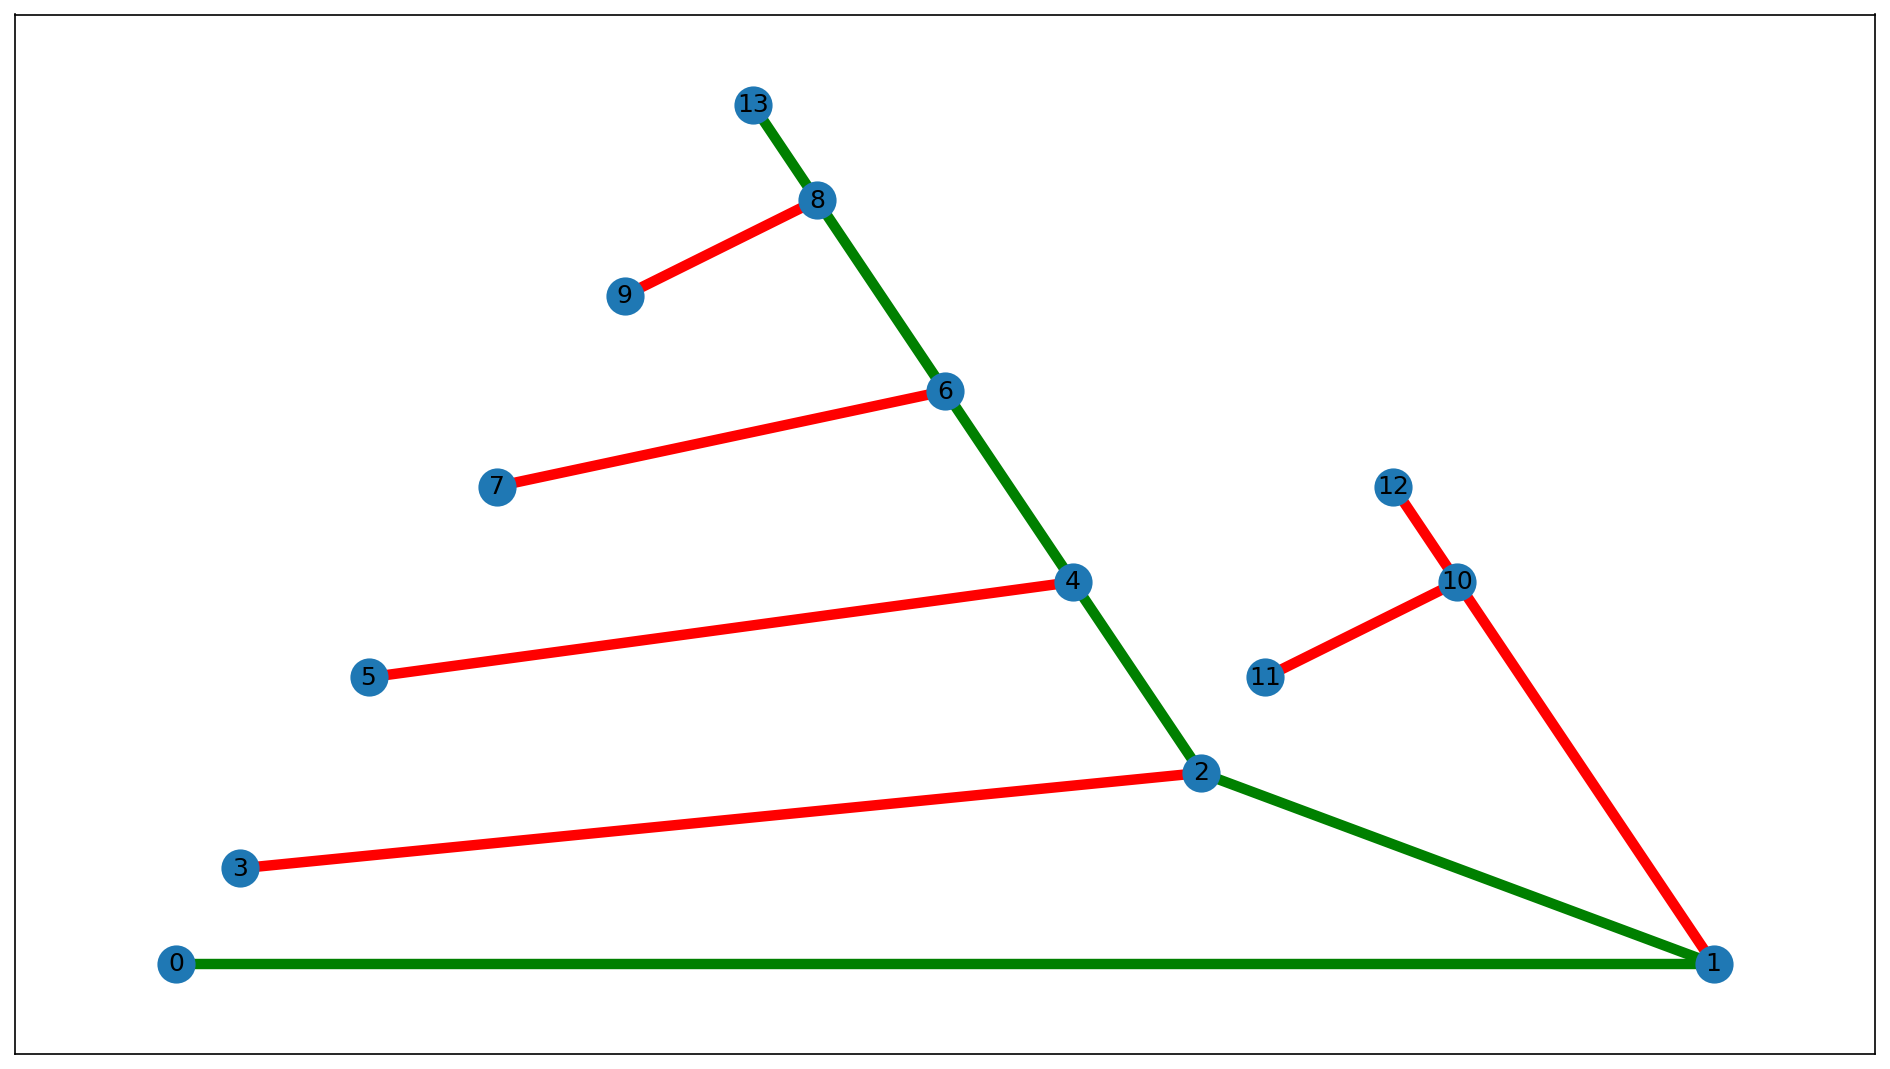

In [3]:
#разобраться с мноэеством и листом, потому что множество не по порядку, с листом не работают некоторые операции

import sys
import networkx as nx

l = list()
frames = []
import sys
import networkx as nx
import numpy as np 

import matplotlib.pyplot as plt
import glob
from PIL import Image

def bfs(graph, start, end, l):
    queue = []
    queue.append([start])
    while queue:
        path = queue.pop(0)
        node = path[-1]
        l.append(path)
        print(path)
        if node == end:
            return path
        for adjacent in graph.get(node, []):
            new_path = list(path)
            new_path.append(adjacent)
            queue.append(new_path)


maze ={
        0: [1],
        1: [2,10],
        2: [3,4],
        3: [],
        4: [5,6],
        5: [],
        6: [7,8],
        7: [],
        8: [9,13],
        9: [],
        10:[11,12],
        11:[],
        12:[],
        13:[]
        }

path_fin=bfs(maze, 0, 13, l)



# Графические настройки
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 11



#edge weight labels
G = nx.Graph(maze)
pos = nx.planar_layout(G)
edge_labels = nx.get_edge_attributes(G, "weight")
#nx.draw_networkx_edge_labels(G, pos, edge_labels);
print(G)
#nx.draw(G, pos, edge_color=color_map);
j = 0
prev = None
visited=[]

for i,j in G.edges:
    G.add_edge(i,j, color = 'black')
    
pos = nx.planar_layout(G)
for path in l:
    for i in path:
        if prev != None:
            #G.add_edge(prev, i, color = 'red')
            #if prev in visited:
            #    G.add_edge(prev, i, color = 'black')
            #else:
            #    G.add_edge(prev, i, color = 'red')
            
            if i<=prev:
                print(prev,i)
            else:
                G.add_edge(prev, i, color = 'red')
            
            edges = G.edges()
            colors = [G[u][v]['color'] for u,v in edges] #Видимо делает лист цвета, но для граней
            nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, width=5)
            #print(G, pos, colors)
            #plt.savefig(f'R:/fig/graph/Figure_{j:02}.png', dpi = 150, bbox_inches='tight')
            plt.savefig(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_{j:003}.png',dpi = 150, bbox_inches='tight')
            plt.close()
            visited.append(prev)
            j=j+1
        else:
            pass
        prev = i
        

for dot in range(len(path)-1):
    G.add_edge(path[dot], path[dot+1], color = 'green')

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges] #Видимо делает лист цвета, но для граней
nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, width=5)
#print(G, pos, colors)
#plt.savefig(f'R:/fig/graph/Figure_{j:02}.png', dpi = 150, bbox_inches='tight')
plt.savefig(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_999.png',dpi = 150, bbox_inches='tight')
plt.close()
visited.append(prev)
        

#for i in l:
#    G.add_edge(j, i, color = 'red')
#    j = i

#склейка кадров

for i in range (12,71):
    #frame = Image.open(f'R:/fig/graph/Figure_{i:02}.png')
    frame = Image.open(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_{i:003}.png')
    frames.append(frame)
frame = Image.open(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_999.png')
for i in range (20):
    frames.append(frame)

#Превращаем в гифку

#frames[0].save(
#    'R:/fig/graph/test.gif',
#    save_all = True,
#    append_images = frames[1:],
#    optimize = True,
#    duration = 500,
#    loop = 0
#)

frames[0].save(
    '/Users/died_mau5/Desktop/ZEZIN/TRASH/test.gif',
    save_all = True,
    append_images = frames[1:],
    optimize = True,
    duration = 200,
    loop = 0
)
nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, width=5)
#print(l)

In [8]:

from PIL import Image

frames = []

for i in range (12,71):
    #frame = Image.open(f'R:/fig/graph/Figure_{i:02}.png')
    frame = Image.open(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_{i:003}.png')
    frames.append(frame)
frame = Image.open(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_999.png')
for i in range (20):
    frames.append(frame)

#Превращаем в гифку

#frames[0].save(
#    'R:/fig/graph/test.gif',
#    save_all = True,
#    append_images = frames[1:],
#    optimize = True,
#    duration = 500,
#    loop = 0
#)

frames[0].save(
    '/Users/died_mau5/Desktop/ZEZIN/TRASH/test.gif',
    save_all = True,
    append_images = frames[1:],
    optimize = True,
    duration = 200,
    loop = 0
)

In [9]:
nx.draw_networkx(G, pos, with_labels=True, edge_color=colors)

NameError: name 'nx' is not defined

In [4]:
import random



boba=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0]

def generate_random_graph(n, max_weight):
    # Initialize an empty adjacency matrix with n nodes
    graph = [[0 for i in range(n)] for j in range(n)]
    
    # Iterate over all pairs of nodes
    for i in range(n):
        for j in range(i + 1, n):
            # Generate a random weight between 0 and max_weight
            #weight = random.randint(0, max_weight)
            weight = random.choice(boba)
            # Add an edge between nodes i and j with weight "weight"
            graph[i][j] = weight
            graph[j][i] = weight
    
    return graph


def matrix_to_set(M):
    graph = {}
    num_nodes = len(M)
    
    # add nodes to graph
    for i in range(num_nodes):
        node_name = str(i+1)
        graph[node_name] = set()
    
    # add edges to graph
    for i in range(num_nodes):
        for j in range(num_nodes):
            if M[i][j] != 0:
                node1 = str(i+1)
                node2 = str(j+1)
                graph[node1].add(node2)
    
    # add start and finish nodes
    #graph['s'] = set(['1'])
    #graph['f'] = set([str(num_nodes)])
    
    return graph

def matrix_to_unset(matrix):
    graph = {}
    num_nodes = len(matrix)
    
    for i in range(num_nodes):
        node = str(i)
        neighbors = []
        for j in range(num_nodes):
            if matrix[i][j] != 0:
                neighbors.append(str(j))
        graph[node] = neighbors
    return graph

M=generate_random_graph(4,1)
print(M)
print(matrix_to_set(M))
print(matrix_to_unset(M))

[[0, 1, 1, 1], [1, 0, 0, 1], [1, 0, 0, 1], [1, 1, 1, 0]]
{'1': {'2', '3', '4'}, '2': {'1', '4'}, '3': {'1', '4'}, '4': {'1', '3', '2'}}
{'0': ['1', '2', '3'], '1': ['0', '3'], '2': ['0', '3'], '3': ['0', '1', '2']}
